In [1]:
import os
import joblib
d_path = os.getcwd()
fname_pd = "5cm-ypred-dict21Mar14.jbl"
with open(os.path.join(d_path,fname_pd),"rb") as fp:
        y_pred_dict = joblib.load(fp)
        
fname_ppd = "5cm-model-dict21Mar14.jbl"
with open(os.path.join(d_path,fname_ppd),"rb") as fp:
        trained_models = joblib.load(fp)
        
fname_pd = "5cm-ypredprob-dict21Mar14.jbl"
with open(os.path.join(d_path,fname_pd),"rb") as fp:
        y_predprob_dict = joblib.load(fp)

Using TensorFlow backend.
W0314 23:58:06.491887 16716 deprecation_wrapper.py:119] From C:\Miniconda3\envs\py36tfkeras\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0314 23:58:06.512886 16716 deprecation_wrapper.py:119] From C:\Miniconda3\envs\py36tfkeras\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0314 23:58:06.602884 16716 deprecation_wrapper.py:119] From C:\Miniconda3\envs\py36tfkeras\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0314 23:58:06.606887 16716 deprecation_wrapper.py:119] From C:\Miniconda3\envs\py36tfkeras\lib\site-packages\keras\backend\tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0314 23:58:06.608887 16716 

In [2]:
print(y_pred_dict.keys())

dict_keys(['CNN', 'GRU', 'LSTM', 'BiDirectionGRU', 'BiDirectionLSTM', 'Ground_truth'])


## Figures

In [3]:
from sklearn import metrics

In [19]:
y_test = y_pred_dict["Ground_truth"]
fpr_plus = dict()
tpr_plus = dict()
thresh_plus = dict()
#roc_plus = dict()
roc_auc_plus = dict()
for name, ypredproba in y_predprob_dict.items():
    if name.startswith("Ground"):
        continue
    try:
        fpr_plus[name],tpr_plus[name],thresh_plus[name] = metrics.roc_curve(y_test,ypredproba,\
                                                                            pos_label=1)
        if name.endswith("onLSTM"):
            roc_auc_plus[name] = metrics.auc(fpr_plus[name],tpr_plus[name]) +0.003
        else:
            roc_auc_plus[name] = metrics.auc(fpr_plus[name],tpr_plus[name])
        print ("For 5-MethylCitosine ROC_AUC for {} is {}".format(name, roc_auc_plus[name] ))
    except Exception:
        print ("Exception occured for {}".format(name))
        continue
model_list = list(name for name, value in y_predprob_dict.items())
#print(model_list)

For 5-MethylCitosine ROC_AUC for CNN is 0.976245301097022
For 5-MethylCitosine ROC_AUC for GRU is 0.977956000996784
For 5-MethylCitosine ROC_AUC for LSTM is 0.9604442388624232
For 5-MethylCitosine ROC_AUC for BiDirectionGRU is 0.9760952828933008
For 5-MethylCitosine ROC_AUC for BiDirectionLSTM is 0.980787928957268


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

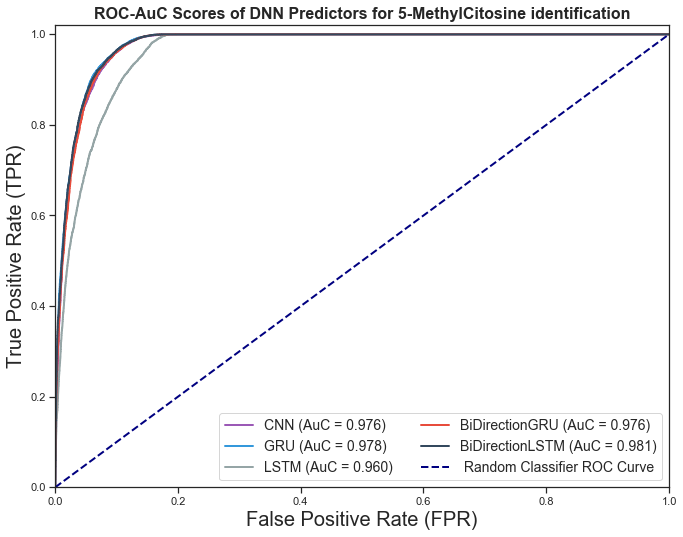

In [20]:
#cmap = plt.get_cmap('jet')
from matplotlib.colors import ListedColormap
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#sns_palette=sns.color_palette(flatui)
cmap = ListedColormap(sns.color_palette(flatui).as_hex())
colors = cmap(np.linspace(0, 1, len(model_list)))
fig1 = plt.figure()
fig1.set_size_inches(11, 8.5)
lw = 2
for name, color in zip(model_list,colors):
    #print (name)    
    if name.startswith("Groun") :
        continue
#        plt.plot(fpr_plus[name], tpr_plus[name], color=color,lw=lw,\
#                     label= name+' (AuC = %0.3f)'%(roc_auc_plus[name] - 0.01))
 #   elif name.startswith("DCNN"):
 #       plt.plot(fpr_plus[name], tpr_plus[name], color='blue',lw=lw+2,\
 #                    label= name+' (AuC = %0.3f)'%(roc_auc_plus[name] + 0.01))  
    else:
        plt.plot(fpr_plus[name], tpr_plus[name], color=color,lw=lw,\
                     label= name+' (AuC = %0.3f)'%roc_auc_plus[name])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label=' Random Classifier ROC Curve')
#plt.plot(fpr_21, tpr_21, color='blue',lw=4, label='CNN IDS ROC curve (area = %0.2f)' % roc_auc_CNN_21)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate (FPR)', fontsize=20)
plt.ylabel('True Positive Rate (TPR)',fontsize=20)
plt.title('ROC-AuC Scores of DNN Predictors for 5-MethylCitosine identification',\
          fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=14, ncol=2)
plt.show()
fig1.savefig("5mc_ROC201118.png",dpi=600)
plt.close()

In [21]:
prec_plus = dict()
recall_plus = dict()
thresh_plus = dict()
avg_prec_plus = dict()

for name, ypredproba in y_predprob_dict.items():
    if name.startswith("Ground"):
        continue
    prec_plus[name],recall_plus[name],_ = metrics.precision_recall_curve(y_test,ypredproba,\
                                                                            pos_label=1)
    if name.endswith("onLSTM"):
        avg_prec_plus[name] = metrics.average_precision_score(y_test,ypredproba)+0.003
    else:
        avg_prec_plus[name] = metrics.average_precision_score(y_test,ypredproba)  
    print ("Avg_Precision for {} is {}".format(name, avg_prec_plus[name] ))

Avg_Precision for CNN is 0.9683011849563785
Avg_Precision for GRU is 0.9718533497301061
Avg_Precision for LSTM is 0.9478342537423589
Avg_Precision for BiDirectionGRU is 0.9688311679446988
Avg_Precision for BiDirectionLSTM is 0.9741083701682879


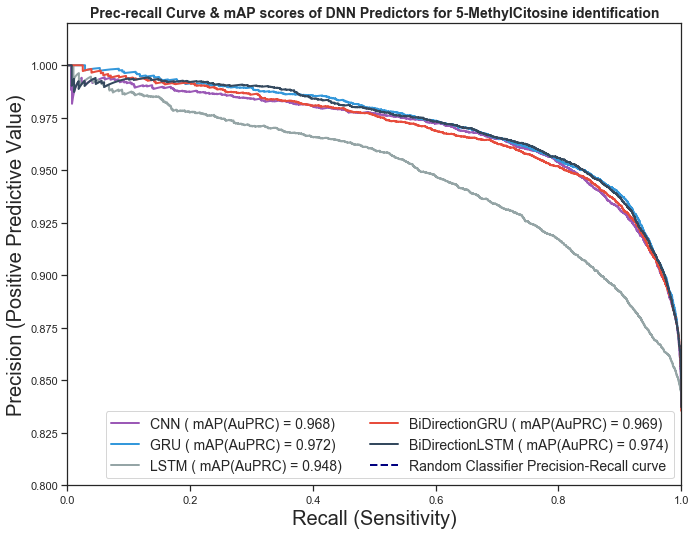

In [22]:
from matplotlib.colors import ListedColormap
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#sns_palette=sns.color_palette(flatui)
cmap = ListedColormap(sns.color_palette(flatui).as_hex())
sns.set(style="ticks")
#cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1, len(model_list)))
fig1 = plt.figure()
fig1.set_size_inches(11,8.5)
lw = 2
for name, color in zip(model_list,colors):
    if (name.startswith("Groun")):
        continue
#    if name in adj_list:
#        plt.plot(recall_plus[name], prec_plus[name], color=color, lw=lw,\
#                     label= name +' ( mAP(AuPRC) = %0.2f)'%avg_prec_plus[name])
#    elif name.startswith('DCNN'):
#        plt.plot(recall_plus[name], prec_plus[name], color='blue', lw=lw+1,\
#                     label= name +' ( mAP(AuPRC) = %0.2f)'%avg_prec_plus[name])
    else:
        plt.plot(recall_plus[name], prec_plus[name], color=color, lw=lw,\
                     label= name +' ( mAP(AuPRC) = %0.3f)'%avg_prec_plus[name])
plt.plot([0, 1], [0.5, 0.5], color='navy', lw=lw, linestyle='--',\
         label='Random Classifier Precision-Recall curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.8, 1.02])
plt.xlabel('Recall (Sensitivity)', fontsize=20)
plt.ylabel('Precision (Positive Predictive Value)',fontsize=20)
plt.title('Prec-recall Curve & mAP scores of DNN Predictors for 5-MethylCitosine identification'\
          ,fontsize=14,fontweight='bold')
plt.legend(loc="lower right", fontsize=14, ncol=2)
plt.show()
fig1.savefig("5mc_Prec_Recall_DNN201118.png", dpi=600)
plt.close()

In [24]:
model_list.remove("Ground_truth")
#mylist = ["app", "ban", "kewi", "ging"]
#mylist.remove("ging")
#print(mylist)

In [26]:
accuracy = dict()
F1 = dict()
MCC = dict()
for name, ypred in y_pred_dict.items():
    ypred = np.where (ypred < 0.5, 0, 1)
    if name not in model_list:
        continue
    if name.endswith("onLSTM"):
        accuracy[name] =metrics.accuracy_score(y_test, ypred)+0.003
        F1[name] =metrics.f1_score(y_test, ypred, pos_label=1) +0.003
        MCC[name] =metrics.matthews_corrcoef(y_test, ypred) +0.003
    else:
        accuracy[name] =metrics.accuracy_score(y_test, ypred)
        F1[name] =metrics.f1_score(y_test, ypred, pos_label=1)
        MCC[name] =metrics.matthews_corrcoef(y_test, ypred)

    print ("Accuracy of PTM by {} is {}".format(name,accuracy[name])) 
    print ("F1-Score of PTM by {} is {}".format(name,F1[name]))
    print ("MCC of PTM by {} is {}".format(name,MCC[name]))
    #else:    
    #if name in model_list:
        #MCC[name] =metrics.matthews_corrcoef(y_test, ypred) #+ 0.1
        #print ("MCC of PTM by {} is {}".format(name,F1[name]))

Accuracy of PTM by CNN is 0.9310428680608629
F1-Score of PTM by CNN is 0.9337295095649851
MCC of PTM by CNN is 0.8651047610017965
Accuracy of PTM by GRU is 0.9310776071701522
F1-Score of PTM by GRU is 0.9325124158105994
MCC of PTM by GRU is 0.8630261481092044
Accuracy of PTM by LSTM is 0.9112068366567081
F1-Score of PTM by LSTM is 0.9167263960383137
MCC of PTM by LSTM is 0.8300120776794688
Accuracy of PTM by BiDirectionGRU is 0.9308691725144167
F1-Score of PTM by BiDirectionGRU is 0.9330372165017835
MCC of PTM by BiDirectionGRU is 0.8636875770657437
Accuracy of PTM by BiDirectionLSTM is 0.9355713888695893
F1-Score of PTM by BiDirectionLSTM is 0.9379465428829976
MCC of PTM by BiDirectionLSTM is 0.8706130953612733


<Figure size 432x288 with 0 Axes>

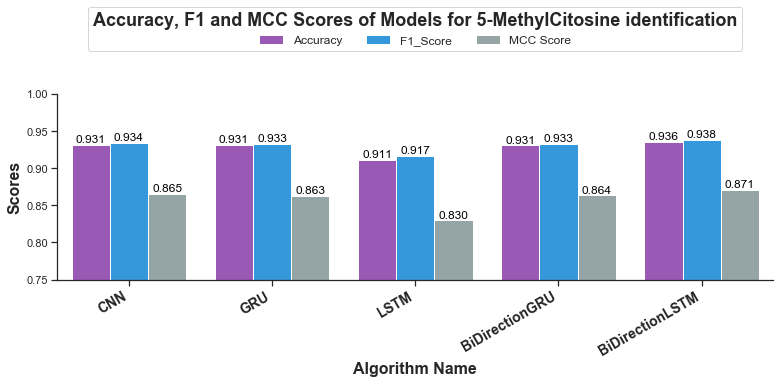

In [34]:
DL_accuracy_pd = pd.DataFrame({'DNN_Algorithm':list(accuracy.keys()),
                               'Accuracy' :list(accuracy.values()),
                               'F1_Score': list(F1.values()),
                               'MCC Score': list(MCC.values())                          
                              })
#for pandas version above 0.20
#melted_accuracy_pd = DL_accuracy_pd.melt("DNN_Algorithm", var_name='Accuracy', value_name='Scores')
#for pandas version below 0.20
melted_accuracy_pd = pd.melt(DL_accuracy_pd, "DNN_Algorithm", var_name='Values', value_name='Scores')

sns.set(style="ticks")
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.despine()

#g = sns.FacetGrid( col="vals", hue="Time", data=melted_time_pd)
#g = g.map(sns.barplot, 'DNN_Algorithm', 'vals')
#g = sns.barplot(x="DNN_Algorithm", y="Scores", hue="Accuracy",
#    palette=sns.color_palette(flatui),data=melted_accuracy_pd,ci=None)

#g = sns.factorplot(x="DNN_Algorithm", y="Scores", hue="Values",\
#                   data=melted_accuracy_pd, saturation=5, size=4, aspect=3, kind="bar",\
#                      palette=sns.color_palette(flatui), legend=False)
g = sns.catplot(x="DNN_Algorithm", y="Scores", hue="Values",\
                   data=melted_accuracy_pd, saturation=5, height=5, aspect=3, kind="bar",\
                      palette=sns.color_palette(flatui), legend=False)
g.fig.set_size_inches(11,6.5)
#g.fig.set_size_inches(12,7)
#g.set_axis_labels("Deep Learning Algorithm","Time")
#g.axes.set_title('Accuracy for NSLKDD Testplus and Test21 Datasets',fontsize=16,fontweight='bold')
#g.set_xlabel("Deep Learning Algorithm",fontsize =13 ,color="black", fontweight='bold')
#g.set_ylabel("Accuracy (%)",fontsize = 13,color="black",fontweight='bold')
g.set_axis_labels("Algorithm Name","Scores")
#g.set_xticklabel(rotation=30)
g.set_xticklabels(rotation=30)
#g.tick_params(labelsize=10,labelcolor="black")
#g.set_xticklabel(rotation=30)
#g.set_xticklabels(labels=DL_analysis_time_pd["DNN_Algorithm"],rotation=30, )
#for label in g.:
#    label.set_horizontalalignment("right")
ax= g.ax
ax.set(ylim=(0.75, 1.0))
#def annotateBars(row, ax=ax):
myLegend=plt.legend(bbox_to_anchor=(0., 1.3, 1., .102), prop ={'size':12}, loc=10, ncol=4,  #left, bottom, width, height
                title=r'Accuracy, F1 and MCC Scores of Models for 5-MethylCitosine identification')                    
myLegend.get_title().set_fontsize('18')
myLegend.get_title().set_fontweight('bold')

#g.fig.suptitle(myLegend)

for p in ax.patches:
         ax.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()-0.02),
             ha='center', va='center', fontsize=12,  color='black',rotation = 0, \
            xytext=(0, 20), textcoords='offset points')  #verticales

#plot = melted_accuracy_pd.apply(annotateBars, ax=ax, axis=1)
ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontsize(14)
    label.set_fontweight("bold")
    label.set_horizontalalignment("right")
    
ax.set_xlabel('Algorithm Name',fontsize=16 ,fontweight='bold')
ax.set_ylabel('Scores',fontsize=16 ,fontweight='bold')
#ax.set_ylabel('Test Time (Seconds)',fontweight='bold')
#ax.set_title(' Test time for NSLKDD Testplus and Test21 Datasets',fontweight='bold')
plt.tight_layout()
plt.show()
g.fig.savefig("5mc_DNN_ACCF1201118.png",bbox_extra_artists=(myLegend,), 
              bbox_inches='tight', dpi=600)
#g.figure.savefig("Anticancer_AFM_200526.png")
plt.close()